In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
zri = pd.read_csv('../data/zri_multifamily_v2.csv')

In [31]:
zri['zip'].shape

(93744,)

In [ ]:
#Make zip a string and add leading 0 

In [24]:
zri['zip'] = zri['zip'].astype('string')

In [32]:
zri['zip'] = ["0"+z if len(z)<5 else z for z in zri['zip']]

In [40]:
#Add year 

In [41]:
zri['year'] = pd.to_datetime(zri['year-month'],format="%Y-%m").dt.year

In [73]:
acs = pd.read_csv('../../../zillow_orientation/acs_5yr_merged_v3.csv')

In [74]:
acs['zip'] = acs['zip'].astype('string')

In [75]:
acs['zip'] = ["0"+z if len(z)<5 else z for z in acs['zip']]

In [76]:
acs['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [77]:
acs['year_used']=acs['year']

In [78]:
acs['year_used']= acs['year_used']+2

In [81]:
zri_acs = pd.merge(zri,acs,how='left',left_on=["zip","year"],right_on=["zip","year_used"])

In [87]:
zri.shape[0]==zri_acs.shape[0]

True

In [85]:
len(zri_acs['zip'].unique())

1302

In [96]:
zri_acs.select_dtypes(['int','float']).columns.to_list()

['zri',
 'year_x',
 'do_date',
 'nonfamily_households',
 'family_households',
 'median_year_structure_built',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_40_to_50_percent',
 'rent_35_to_40_percent',
 'rent_30_to_35_percent',
 'rent_25_to_30_percent',
 'rent_20_to_25_percent',
 'rent_15_to_20_percent',
 'rent_10_to_15_percent',
 'rent_under_10_percent',
 'total_pop',
 'male_pop',
 'female_pop',
 'median_age',
 'white_pop',
 'black_pop',
 'asian_pop',
 'hispanic_pop',
 'amerindian_pop',
 'other_race_pop',
 'two_or_more_races_pop',
 'not_hispanic_pop',
 'commuters_by_public_transportation',
 'households',
 'income_per_capita',
 'housing_units',
 'vacant_housing_units',
 'vacant_housing_units_for_rent',
 'vacant_housing_units_for_sale',
 'owner_occupied_housing_units',
 'million_dollar_housing_units',
 'mortgaged_housing_units',
 'families_with_young_children',
 'two_parent_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_par

In [113]:
jc = zri_acs[(zri_acs['zip']=="07302") & (zri_acs['year_x']==2018)]
jc['bachelors_degree_2']

14304    12720.0
14305    12720.0
14306    12720.0
14307    12720.0
14308    12720.0
14309    12720.0
14310    12720.0
14311    12720.0
14312    12720.0
14313    12720.0
14314    12720.0
14315    12720.0
Name: bachelors_degree_2, dtype: float64

In [114]:
jc['total_pop']

14304    41026.0
14305    41026.0
14306    41026.0
14307    41026.0
14308    41026.0
14309    41026.0
14310    41026.0
14311    41026.0
14312    41026.0
14313    41026.0
14314    41026.0
14315    41026.0
Name: total_pop, dtype: float64

In [ ]:
jc['po']

In [115]:
jc['some_college_and_associates_degree']

14304    3551.0
14305    3551.0
14306    3551.0
14307    3551.0
14308    3551.0
14309    3551.0
14310    3551.0
14311    3551.0
14312    3551.0
14313    3551.0
14314    3551.0
14315    3551.0
Name: some_college_and_associates_degree, dtype: float64

In [181]:
#DROP zipcode 11249 as it is not in ACS data 

In [182]:
zri_acs = zri_acs.drop(index=zri_acs[zri_acs['zip']=="11249"].index)
zri_acs

,zip,City,State,Metro,CountyName,year-month,zri,year_x,do_date,nonfamily_households,...,worked_at_home,workers_16_and_over,commute_35_44_mins,commute_60_more_mins,commute_less_10_mins,commuters_16_over,hispanic_any_race,year_y,year_used,derived_pop_over_25
0,01013,Chicopee,MA,Springfield,Hampden County,2014-01,928.0,2014,20082012.0,3688.0,...,159.0,9514.0,322.0,359.0,1506.0,9355.0,5046.0,2012.0,2014.0,14277.0
1,01013,Chicopee,MA,Springfield,Hampden County,2014-02,931.0,2014,20082012.0,3688.0,...,159.0,9514.0,322.0,359.0,1506.0,9355.0,5046.0,2012.0,2014.0,14277.0
2,01013,Chicopee,MA,Springfield,Hampden County,2014-03,934.0,2014,20082012.0,3688.0,...,159.0,9514.0,322.0,359.0,1506.0,9355.0,5046.0,2012.0,2014.0,14277.0
3,01013,Chicopee,MA,Springfield,Hampden County,2014-04,929.0,2014,20082012.0,3688.0,...,159.0,9514.0,322.0,359.0,1506.0,9355.0,5046.0,2012.0,2014.0,14277.0
4,01013,Chicopee,MA,Springfield,Hampden County,2014-05,929.0,2014,20082012.0,3688.0,...,159.0,9514.0,322.0,359.0,1506.0,9355.0,5046.0,2012.0,2014.0,14277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93739,99654,Wasilla,AK,Anchorage,Matanuska Susitna Borough,2019-08,1277.0,2019,20132017.0,5160.0,...,1416.0,24847.0,795.0,5480.0,2822.0,23431.0,3067.0,2017.0,2019.0,38001.0
93740,99654,Wasilla,AK,Anchorage,Matanuska Susitna Borough,2019-09,1271.0,2019,20132017.0,5160.0,...,1416.0,24847.0,795.0,5480.0,2822.0,23431.0,3067.0,2017.0,2019.0,38001.0
93741,99654,Wasilla,AK,Anchorage,Matanuska Susitna Borough,2019-10,1299.0,2019,20132017.0,5160.0,...,1416.0,24847.0,795.0,5480.0,2822.0,23431.0,3067.0,2017.0,2019.0,38001.0
93742,99654,Wasilla,AK,Anchorage,Matanuska Susitna Borough,2019-11,1261.5,2019,20132017.0,5160.0,...,1416.0,24847.0,795.0,5480.0,2822.0,23431.0,3067.0,2017.0,2019.0,38001.0


In [184]:
zri_acs['derived_pop_over_25']= zri_acs[['male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59',
 'male_60_61',
 'male_62_64',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over']].sum(axis='columns')

In [185]:
zri_acs['pop_25_64']

0        11112.0
1        11112.0
2        11112.0
3        11112.0
4        11112.0
          ...   
93739    32424.0
93740    32424.0
93741    32424.0
93742    32424.0
93743    32424.0
Name: pop_25_64, Length: 93672, dtype: float64

<AxesSubplot:>

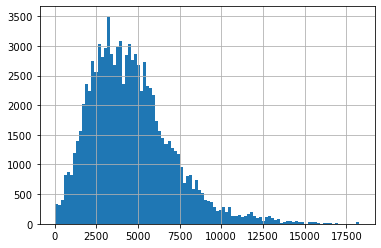

In [186]:
(zri_acs['derived_pop_over_25']-zri_acs['pop_25_64']).hist(bins=100)

<AxesSubplot:>

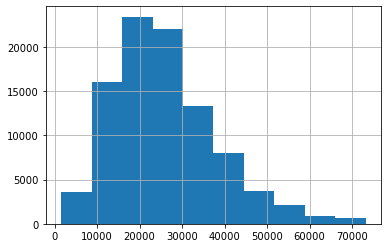

In [187]:
zri_acs['derived_pop_over_25'].hist()

<AxesSubplot:>

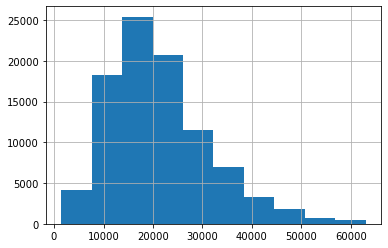

In [188]:
zri_acs['pop_25_64'].hist()

In [189]:
zri_acs['derived_pop_over_25'].min()

1596.0

# Education

In [190]:
percent_graduate = zri_acs['graduate_professional_degree']/zri_acs['total_pop'] #population 
percent_bachelors = zri_acs['bachelors_degree_2']/zri_acs['total_pop'] #population 
percent_associates = zri_acs['some_college_and_associates_degree']/zri_acs['derived_pop_over_25'] #25 and over 
percent_highschool = zri_acs['high_school_including_ged']/zri_acs['derived_pop_over_25']  #25 and over 
percent_less_highschool = zri_acs['less_than_high_school_graduate']/zri_acs['derived_pop_over_25']  #25 and over 


# Commute 

In [206]:
percent_commute_public_transport = zri_acs['commuters_by_public_transportation']/zri_acs['commuters_16_over'] 

In [216]:
percent_commute_less_30 = (zri_acs[['commute_5_9_mins',
                                   'commute_10_14_mins',
                                   'commute_15_19_mins',
                                   'commute_20_24_mins',
                                   'commute_25_29_mins']].sum(axis='columns'))/zri_acs['commuters_16_over']

percent_commute_30_to_59 = (zri_acs[['commute_30_34_mins',
                                     'commute_35_44_mins',
                                     'commute_35_39_mins',
                                     'commute_40_44_mins',
                                     'commute_45_59_mins']].sum(axis='columns'))/zri_acs['commuters_16_over']

percent_commute_60_to_89 = zri_acs['commute_60_89_mins']/zri_acs['commuters_16_over']

percent_commute_90_more = zri_acs['commute_90_more_mins']/zri_acs['commuters_16_over']

# Movers

In [217]:
#moved to this city from another city 
percent_new_city = zri_acs['different_house_year_ago_different_city']/zri_acs['total_pop']

In [ ]:
#moved to a new unit in this same city
percent_new_unit = zri_acs['different_house_year_ago_same_city']/zri_acs['total_pop']

# Renter occupied 

In [220]:
#Renter occupied housing units. All occupied units which are not owner occupied, whether they 
#are rented for cash rent or occupied without payment of cash rent, are classified as renter-occupied.
percent_renter_occupied = zri_acs['housing_units_renter_occupied']/zri_acs['housing_units']

In [222]:
percent_owner_occupied = zri_acs['owner_occupied_housing_units']/zri_acs['housing_units']

In [ ]:
percent_for_rent = zri_acs['vacant_housing_units_for_rent']/zri_acs['housing_units']

In [ ]:
median_age = zri_acs['median_age']

In [ ]:
#dwellings 50 and more
#year built  

In [ ]:
# percent_commute_
# 'commute_5_9_mins',
# 'commute_10_14_mins',
#  'commute_15_19_mins',
#  'commute_20_24_mins',
#  'commute_25_29_mins',
#  'commute_30_34_mins',
# 'commute_35_44_mins',
#  'commute_35_39_mins',
# 'commute_40_44_mins',
#  'commute_45_59_mins',
#  'commute_60_89_mins',
#  'commute_90_more_mins',
#  'commute_60_more_mins',
#  'commute_less_10_mins',
#  'commuters_16_over',